A lot of prior work has been done on this dataset. I built three neural network model: one with no outlier removal algorithm, one with "IsolationForest", one with "EllipticEvelope". While accuracy on training data topped at 95%, accuracy on test data is at most 64%. 

I accidentally deleted the notebook containing the codes and outputs of the three models described above. I am not going to repeat that. In this notebook, I will build two neural network models on this dataset: one without outlier detection algorithm, one with outlier detection algorithm, so that we can compare the effect of the outlier algorithm on the model's accuracy on test data.

In [1]:
import pandas as pd
df=pd.read_csv("winequality-white.csv",sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [2]:
import numpy as np
np.unique(df[["quality"]])

array([3, 4, 5, 6, 7, 8, 9])

As shown, there are 7 classes in the target variable. Given the problems with a 7-class classification model, the new strategy I am going to try is to group the wines into 3 new classes: quality 3 & 4 --> low, quality 5, 6, 7 --> medium, quality 8, 9 --> high. Before we do that, let's seperate the predictor variables and target variable first.

In [3]:
X=df.drop(["quality"],axis=1)

from sklearn import preprocessing
names=X.columns
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X, columns=names)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203


Next, we are going to transform the target variable "quality" into 3 classes: low, medium and high. I could either connect to my account at IBM's Db2 and then write some SQL queries to do that, or I can just write a few lines of Python codes here. I am going to use the latter method: just write a few lines of Python codes here.

In [4]:
y=df[["quality"]]
y.head()

,quality
0,6
1,6
2,6
3,6
4,6


In [5]:
low_3=y[y["quality"]==3]
low_3=low_3.replace(3,"low")
low_3.head()

,quality
251,low
253,low
294,low
445,low
740,low


In [6]:
low_3.shape

(20, 1)

In [7]:
low_4=y[y["quality"]==4]
low_4=low_4.replace(4,"low")
low_4.head()

,quality
46,low
98,low
115,low
147,low
172,low


In [8]:
low_4.shape

(163, 1)

In [9]:
low=pd.concat([low_3,low_4],axis=0)
low.head()

,quality
251,low
253,low
294,low
445,low
740,low


In [10]:
low.shape

(183, 1)

In [11]:
med_5=y[y["quality"]==5]
med_5=med_5.replace(5,"medium")
med_6=y[y["quality"]==6]
med_6=med_6.replace(6,"medium")
med_7=y[y["quality"]==7]
med_7=med_7.replace(7,"medium")
med=pd.concat([med_5,med_6,med_7],axis=0)
med.head()

,quality
10,medium
11,medium
12,medium
14,medium
19,medium


In [12]:
med.shape

(4535, 1)

In [13]:
high_8=y[y["quality"]==8]
high_8=high_8.replace(8,"high")
high_9=y[y["quality"]==9]
high_9=high_9.replace(9,"high")
high=pd.concat([high_8, high_9],axis=0)
high.head()

,quality
17,high
20,high
22,high
68,high
74,high


In [14]:
y_transformed=pd.concat([low,med,high],axis=0)
y_transformed.shape

(4898, 1)

One-hot encode the target variable.

In [15]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(handle_unknown="ignore")
y=pd.DataFrame(enc.fit_transform(y_transformed).toarray())
y.head()

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


The dataset is now standardized and transformed. Split the data into train and test subsets.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4,random_state=42)

Build the neural network model.

In [17]:
length=X_train.shape[1]
num_classes=y_test.shape[1]

# Load the libraries
import keras
from keras.models import Sequential
from keras.layers import Dense

# define classification model

def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(length, activation='relu', input_shape=(length,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation= 'relu'))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Using TensorFlow backend.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/con

In [18]:
model=classification_model()
model.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=15, verbose=2)
model.evaluate(X_test,y_test,verbose=0)

Train on 2938 samples, validate on 1960 samples
Epoch 1/15
 - 3s - loss: 0.4711 - acc: 0.9047 - val_loss: 0.3443 - val_acc: 0.9204
Epoch 2/15
 - 2s - loss: 0.3087 - acc: 0.9295 - val_loss: 0.3313 - val_acc: 0.9204
Epoch 3/15
 - 2s - loss: 0.2947 - acc: 0.9295 - val_loss: 0.3225 - val_acc: 0.9204
Epoch 4/15
 - 2s - loss: 0.2849 - acc: 0.9295 - val_loss: 0.3262 - val_acc: 0.9204
Epoch 5/15
 - 2s - loss: 0.2747 - acc: 0.9295 - val_loss: 0.3314 - val_acc: 0.9204
Epoch 6/15
 - 2s - loss: 0.2705 - acc: 0.9295 - val_loss: 0.3150 - val_acc: 0.9204
Epoch 7/15
 - 2s - loss: 0.2599 - acc: 0.9295 - val_loss: 0.3163 - val_acc: 0.9204
Epoch 8/15
 - 2s - loss: 0.2585 - acc: 0.9295 - val_loss: 0.3150 - val_acc: 0.9204
Epoch 9/15
 - 2s - loss: 0.2503 - acc: 0.9295 - val_loss: 0.3243 - val_acc: 0.9204
Epoch 10/15
 - 2s - loss: 0.2530 - acc: 0.9295 - val_loss: 0.3131 - val_acc: 0.9204
Epoch 11/15
 - 2s - loss: 0.2404 - acc: 0.9295 - val_loss: 0.3203 - val_acc: 0.9204
Epoch 12/15
 - 2s - loss: 0.2384 - ac

[0.32053522370299514, 0.9204081632653062]

That is a commendable result. By re-classifying the wine quality into "low", "medium" and "high", the neural network algorithm has a 92.04% accuracy on test data, with no outlier removal algorithm or feature selection algorithm.

Let's implement an outlier removal algorithm and see whether it will improve accuracy.

In [19]:
from sklearn.covariance import EllipticEnvelope
clf = EllipticEnvelope(random_state=0).fit(X)
outlier_label=pd.DataFrame(clf.predict(X))
outlier_label=outlier_label.rename(columns={0:"outlier_label"})
outlier_label


,outlier_label
0,1
1,1
2,1
3,1
4,1
...,...
4893,1
4894,1
4895,1
4896,1


In [26]:
df_labeled=pd.concat([X,y_transformed,outlier_label],axis=1)
df_labeled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,outlier_label
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,medium,1
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,medium,1
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,medium,1
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,medium,1
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,medium,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.776015,-0.677101,-0.365197,-0.944765,-0.310008,-0.664970,-1.091000,-0.965483,0.541334,0.088973,0.557282,medium,1
4894,-0.301959,0.414339,0.213280,0.317179,0.056196,1.275590,0.697499,0.291789,-0.253446,-0.261553,-0.743008,medium,1
4895,-0.420473,-0.379435,-1.191592,-1.023637,-0.218457,-0.312141,-0.643875,-0.497350,-1.313153,-0.261553,-0.905544,medium,1
4896,-1.605613,0.116674,-0.282557,-1.043355,-1.088192,-0.900190,-0.667408,-1.784717,1.004955,-0.962605,1.857572,medium,1


In [27]:
df_cleaned=df_labeled[df_labeled["outlier_label"]==1]
df_cleaned=df_cleaned.drop(["outlier_label"],axis=1)
df_cleaned

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,medium
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,medium
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,medium
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,medium
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,medium
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.776015,-0.677101,-0.365197,-0.944765,-0.310008,-0.664970,-1.091000,-0.965483,0.541334,0.088973,0.557282,medium
4894,-0.301959,0.414339,0.213280,0.317179,0.056196,1.275590,0.697499,0.291789,-0.253446,-0.261553,-0.743008,medium
4895,-0.420473,-0.379435,-1.191592,-1.023637,-0.218457,-0.312141,-0.643875,-0.497350,-1.313153,-0.261553,-0.905544,medium
4896,-1.605613,0.116674,-0.282557,-1.043355,-1.088192,-0.900190,-0.667408,-1.784717,1.004955,-0.962605,1.857572,medium


In [28]:
X=df_cleaned.drop(["quality"],axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.776015,-0.677101,-0.365197,-0.944765,-0.310008,-0.664970,-1.091000,-0.965483,0.541334,0.088973,0.557282
4894,-0.301959,0.414339,0.213280,0.317179,0.056196,1.275590,0.697499,0.291789,-0.253446,-0.261553,-0.743008
4895,-0.420473,-0.379435,-1.191592,-1.023637,-0.218457,-0.312141,-0.643875,-0.497350,-1.313153,-0.261553,-0.905544
4896,-1.605613,0.116674,-0.282557,-1.043355,-1.088192,-0.900190,-0.667408,-1.784717,1.004955,-0.962605,1.857572


Let's also try feature selection algorithm. We are not sure if all features are relevant.

In [31]:
y=df_cleaned[["quality"]]

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# feature extraction. We are going to output the selection scores for all features and select the features with the highest scores.
test = SelectKBest(score_func=mutual_info_classif, k="all")
fit = test.fit(X, y)
features = fit.transform(X)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores.sort_values(by=["scores"],ascending=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,scores
2,0.005500
9,0.006763
1,0.008760
4,0.008840
0,0.009724
8,0.010908
3,0.018448
6,0.022695
5,0.025974
7,0.030428


All features have non-zero feature importance score. That means all features have varying degrees of impact on the classification of a white wine. So, we are going to use all features.

In [32]:
y=df_cleaned[["quality"]]
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(handle_unknown="ignore")
y=pd.DataFrame(enc.fit_transform(y).toarray())
y

,0,1,2
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
4403,0.0,0.0,1.0
4404,0.0,0.0,1.0
4405,0.0,0.0,1.0
4406,0.0,0.0,1.0


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4,random_state=42)

In [38]:
length=X_train.shape[1]
num_classes=y_test.shape[1]

# Load the libraries
import keras
from keras.models import Sequential
from keras.layers import Dense

# define classification model

def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(length, activation='relu', input_shape=(length,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation= 'relu'))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [41]:
model=classification_model()
model.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=15, verbose=2)
model.evaluate(X_test,y_test,verbose=0)

Train on 2644 samples, validate on 1764 samples
Epoch 1/15
 - 3s - loss: 0.4618 - acc: 0.9164 - val_loss: 0.3054 - val_acc: 0.9337
Epoch 2/15
 - 2s - loss: 0.2936 - acc: 0.9357 - val_loss: 0.2858 - val_acc: 0.9337
Epoch 3/15
 - 2s - loss: 0.2679 - acc: 0.9357 - val_loss: 0.2790 - val_acc: 0.9337
Epoch 4/15
 - 2s - loss: 0.2548 - acc: 0.9357 - val_loss: 0.2753 - val_acc: 0.9337
Epoch 5/15
 - 2s - loss: 0.2450 - acc: 0.9357 - val_loss: 0.2741 - val_acc: 0.9337
Epoch 6/15
 - 2s - loss: 0.2361 - acc: 0.9365 - val_loss: 0.2798 - val_acc: 0.9337
Epoch 7/15
 - 2s - loss: 0.2311 - acc: 0.9357 - val_loss: 0.2797 - val_acc: 0.9337
Epoch 8/15
 - 2s - loss: 0.2216 - acc: 0.9361 - val_loss: 0.2747 - val_acc: 0.9337
Epoch 9/15
 - 2s - loss: 0.2177 - acc: 0.9365 - val_loss: 0.2879 - val_acc: 0.9337
Epoch 10/15
 - 2s - loss: 0.2132 - acc: 0.9365 - val_loss: 0.2917 - val_acc: 0.9337
Epoch 11/15
 - 2s - loss: 0.2079 - acc: 0.9349 - val_loss: 0.2756 - val_acc: 0.9337
Epoch 12/15
 - 2s - loss: 0.2022 - ac

[0.31108894340204, 0.9336734693877551]

With an outlier removal algorithm, accuaracy on test data is improved by 1.33% to 93.37%.

We got a good model that can predict whether a white wine is of low, medium or high quality 93.37% of the time. Let's also analyze how the white wines of different quality compares to each other. To do that, we are going to use the original dataset before the transformation.

Re-load the original dataset.

In [36]:
import pandas as pd
df=pd.read_csv("winequality-white.csv",sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [37]:
import numpy as np
print(np.unique(df[["quality"]]))

[3 4 5 6 7 8 9]


In [38]:
df_3=df[df["quality"]==3]
df_3=pd.DataFrame(df_3.mean()).drop(["quality"],axis=0).rename(columns={0:"quality_3"})
df_3

,quality_3
fixed acidity,7.600000
volatile acidity,0.333250
citric acid,0.336000
residual sugar,6.392500
chlorides,0.054300
free sulfur dioxide,53.325000
total sulfur dioxide,170.600000
density,0.994884
pH,3.187500
sulphates,0.474500


In [39]:
df_4=df[df["quality"]==4]
df_4=pd.DataFrame(df_4.mean()).drop(["quality"],axis=0).rename(columns={0:"quality_4"})
df_4

,quality_4
fixed acidity,7.129448
volatile acidity,0.381227
citric acid,0.304233
residual sugar,4.628221
chlorides,0.050098
free sulfur dioxide,23.358896
total sulfur dioxide,125.279141
density,0.994277
pH,3.182883
sulphates,0.476135


In [40]:
df_5=df[df["quality"]==5]
df_5=pd.DataFrame(df_5.mean()).drop(["quality"],axis=0).rename(columns={0:"quality_5"})
df_5

,quality_5
fixed acidity,6.933974
volatile acidity,0.302011
citric acid,0.337653
residual sugar,7.334969
chlorides,0.051546
free sulfur dioxide,36.432052
total sulfur dioxide,150.904598
density,0.995263
pH,3.168833
sulphates,0.482203


In [41]:
df_6=df[df["quality"]==6]
df_6=pd.DataFrame(df_6.mean()).drop(["quality"],axis=0).rename(columns={0:"quality_6"})
df_6

,quality_6
fixed acidity,6.837671
volatile acidity,0.260564
citric acid,0.338025
residual sugar,6.441606
chlorides,0.045217
free sulfur dioxide,35.650591
total sulfur dioxide,137.047316
density,0.993961
pH,3.188599
sulphates,0.491106


In [42]:
df_7=df[df["quality"]==7]
df_7=pd.DataFrame(df_7.mean()).drop(["quality"],axis=0).rename(columns={0:"quality_7"})
df_7

,quality_7
fixed acidity,6.734716
volatile acidity,0.262767
citric acid,0.325625
residual sugar,5.186477
chlorides,0.038191
free sulfur dioxide,34.125568
total sulfur dioxide,125.114773
density,0.992452
pH,3.213898
sulphates,0.503102


In [43]:
df_8=df[df["quality"]==8]
df_8=pd.DataFrame(df_8.mean()).drop(["quality"],axis=0).rename(columns={0:"quality_8"})
df_8

,quality_8
fixed acidity,6.657143
volatile acidity,0.277400
citric acid,0.326514
residual sugar,5.671429
chlorides,0.038314
free sulfur dioxide,36.720000
total sulfur dioxide,126.165714
density,0.992236
pH,3.218686
sulphates,0.486229


In [44]:
df_9=df[df["quality"]==9]
df_9=pd.DataFrame(df_9.mean()).drop(["quality"],axis=0).rename(columns={0:"quality_9"})
df_9

,quality_9
fixed acidity,7.42000
volatile acidity,0.29800
citric acid,0.38600
residual sugar,4.12000
chlorides,0.02740
free sulfur dioxide,33.40000
total sulfur dioxide,116.00000
density,0.99146
pH,3.30800
sulphates,0.46600


In [45]:
mean=pd.concat([df_3,df_4,df_5,df_6,df_7,df_8,df_9],axis=1).T
mean

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality_3,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
quality_4,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454
quality_5,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840
quality_6,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372
quality_7,6.734716,0.262767,0.325625,5.186477,0.038191,34.125568,125.114773,0.992452,3.213898,0.503102,11.367936
quality_8,6.657143,0.277400,0.326514,5.671429,0.038314,36.720000,126.165714,0.992236,3.218686,0.486229,11.636000
quality_9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


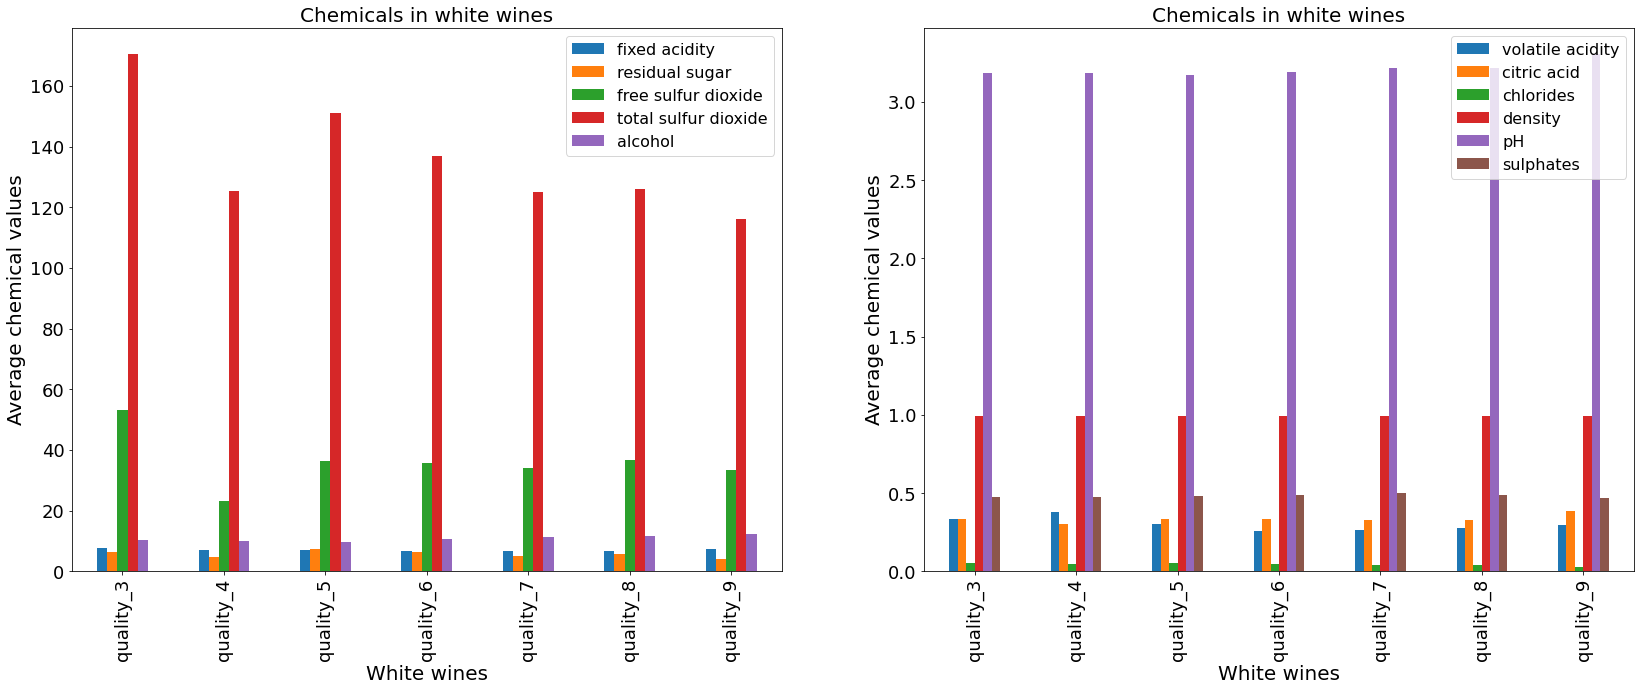

In [46]:
import matplotlib.pyplot as plt
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) 
ax1 = fig.add_subplot(1, 2, 2) 

ax0.tick_params(axis='both', which='major', labelsize=18) 
ax0.tick_params(axis='both', which='minor', labelsize=18)


ax1.tick_params(axis='both', which='major', labelsize=18) 
ax1.tick_params(axis='both', which='minor', labelsize=18)


# Subplot 1: Box plot
mean[["fixed acidity","residual sugar","free sulfur dioxide","total sulfur dioxide","alcohol"]].plot(kind="bar",figsize=(28,10), ax=ax0) # add to subplot 1
ax0.set_title('Chemicals in white wines',fontsize=20)
ax0.set_xlabel("White wines",fontsize=20)
ax0.set_ylabel('Average chemical values',fontsize=20)
ax0.legend(fontsize=16)


# Subplot 2: Line plot
mean[["volatile acidity","citric acid","chlorides","density","pH","sulphates"]].plot(kind='bar', figsize=(28, 10), ax=ax1) # add to subplot 2
ax1.set_title ('Chemicals in white wines',fontsize=20)
ax1.set_xlabel('White wines',fontsize=20)
ax1.set_ylabel('Average chemical values',fontsize=20)
ax1.legend(fontsize=16)


plt.legend(fontsize=16)
plt.show()

Now, we can see what distinguish the high quality white wines from the low quality and medium quality ones. The high quality white wines have: (1) lower free sulfur dioxide and lower total sulfur dioxide; (2) higher alcohol; (3) lower residual sugar; (4) higher pH; (5) higher citric acide; (6) slightly lower density; (7) lower chlorides. All of these factors act together to make the high quality white wines of high quality. Now we know how to choose white wines when we go to a wine store next time. Read the labels. 😄